In [61]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import tempfile
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', size=24, family='serif')
plt.rcParams["figure.figsize"] = (10, 6)
plt.style.use('tableau-colorblind10')

#axes.prop_cycle: cycler(color, [#006BA4, #FF800E, #ABABAB, #595959,
#                 #5F9ED1, #C85200, #898989, #A2C8EC, #FFBC79, #CFCFCF])
#patch.facecolor: #006BA4

import logging
logging.getLogger().setLevel(logging.INFO)

from banditpylib import trials_to_dataframe
from banditpylib.arms import GaussianArm
from banditpylib.bandits import MultiArmedBandit
from banditpylib.protocols import SinglePlayerProtocol
from banditpylib.learners.mab_fcbai_learner import ExpGap, LilUCBHeuristic, TrackAndStop, BatchRacing, BatchTrackAndStop
from banditpylib.utils import argmax_or_min_tuple, argmax_or_min, argmax_or_min_tuple_second

In [62]:
confidence = 0.95

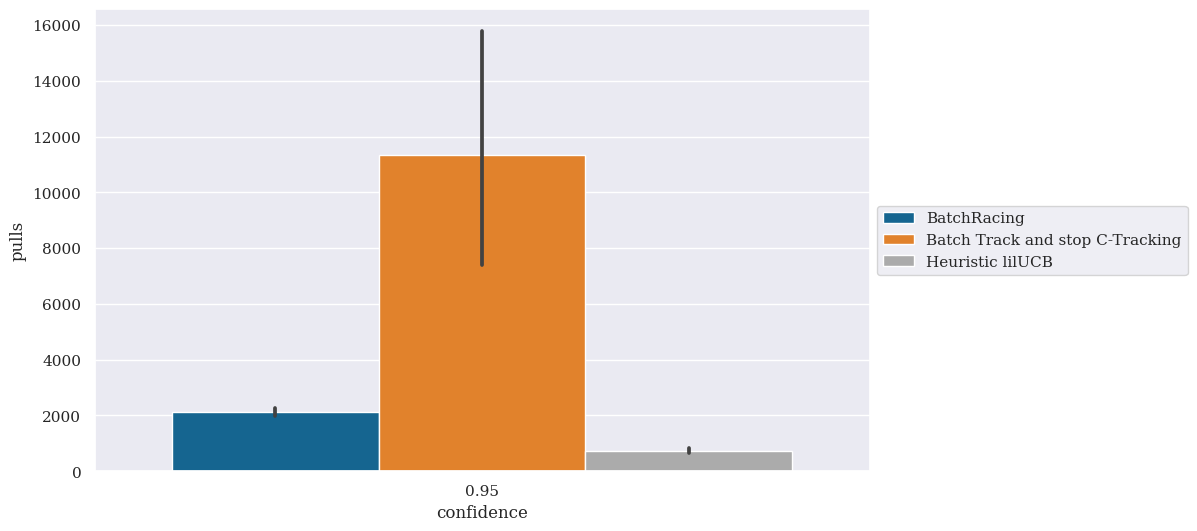

In [63]:
batch_size=8
rho=1e5
means ="m1"

trials_df = pd.read_csv("csv_files/trial_df_means_" + str(means) + "_rho_" + str(rho) + "_batch_size_" + str(batch_size) + "_.csv")
trials_df['confidence'] = confidence 
trials_df['rho'] = rho
trials_df['batch_size'] = batch_size

fig = plt.figure()
ax = plt.subplot(111)
sns.barplot(x='confidence', y='total_actions', hue='learner', data=trials_df)
plt.ylabel('pulls')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [64]:
batch_size=32
rhos= [0.0, 1e1, 1e3, 1e5]
means ="m2"

df = pd.DataFrame({})

"trials_df"
for rho in rhos:
    trials_df = pd.read_csv("csv_files/trial_df_means_" + str(means) + "_rho_" + str(rho) + "_batch_size_" + str(batch_size) + "_.csv")
    trials_df['confidence'] = confidence 
    trials_df['rho'] = rho
    trials_df['batch_size'] = batch_size
    df = df.append(trials_df, ignore_index=True)
    
df.tail()

,rounds,total_actions,regret,other,bandit,learner,confidence,rho,batch_size
1195,2010,2013,0.0,0.0,multi_armed_bandit,Heuristic lilUCB,0.95,100000.0,32
1196,2325,2328,0.0,0.0,multi_armed_bandit,Heuristic lilUCB,0.95,100000.0,32
1197,2833,2836,0.0,0.0,multi_armed_bandit,Heuristic lilUCB,0.95,100000.0,32
1198,1938,1941,0.0,0.0,multi_armed_bandit,Heuristic lilUCB,0.95,100000.0,32
1199,2028,2031,0.0,0.0,multi_armed_bandit,Heuristic lilUCB,0.95,100000.0,32


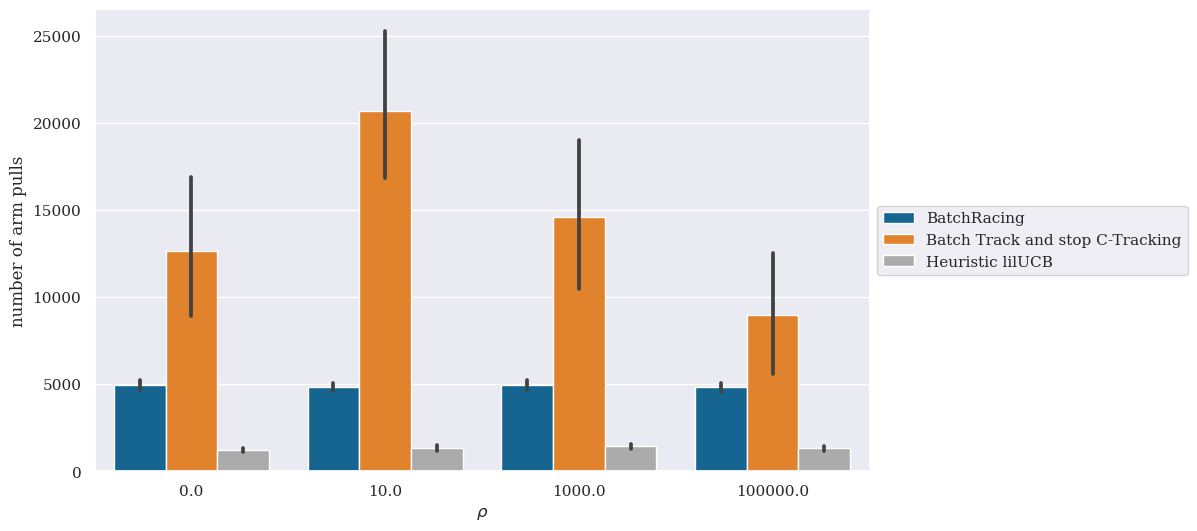

In [55]:
fig = plt.figure()
ax = plt.subplot(111)
sns.barplot(x='rho', y='total_actions', hue='learner', data=df)
plt.ylabel('number of arm pulls')
plt.xlabel(r'$\rho$')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

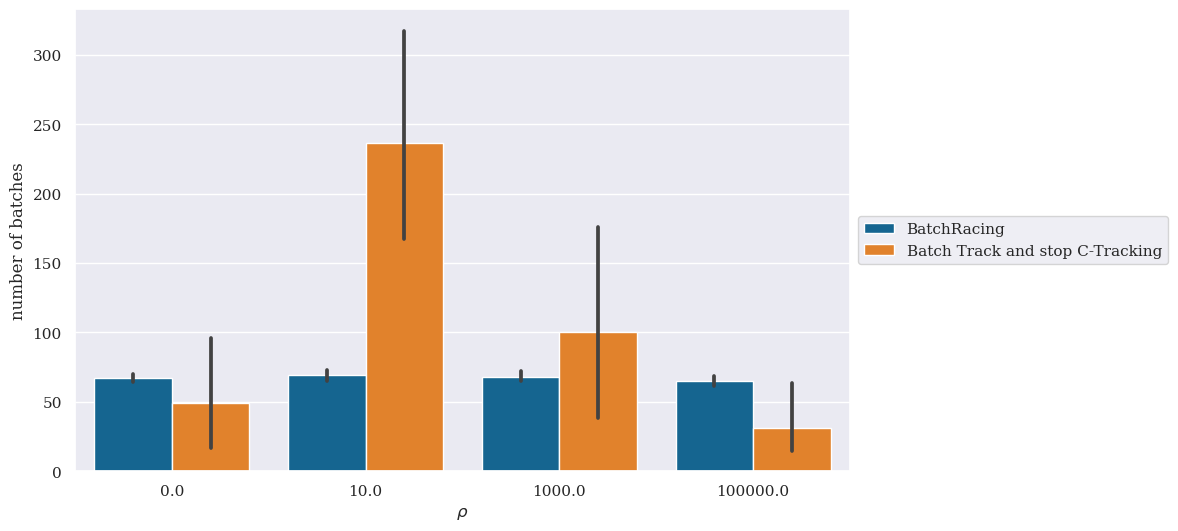

In [44]:
fig = plt.figure()
ax = plt.subplot(111)
df_batches = df[df['learner'] != "Heuristic lilUCB"]
sns.barplot(x='rho', y='rounds', hue='learner', data=df_batches)
plt.ylabel('number of batches')
plt.xlabel(r'$\rho$')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [32]:
rho=1e2
batch_sizes = batch_sizes = [4, 8, 32]
means ="m1"
df = pd.DataFrame({})

for batch_size in batch_sizes:
    trials_df = pd.read_csv("csv_files/trial_df_means_" + str(means) + "_rho_" + str(rho) + "_batch_size_" + str(batch_size) + "_.csv")
    trials_df['confidence'] = confidence 
    trials_df['rho'] = rho
    trials_df['batch_size'] = batch_size
    df = df.append(trials_df, ignore_index=True)
    
df.tail()

FileNotFoundError: [Errno 2] No such file or directory: 'csv_files/trial_df_means_m1_rho_100.0_batch_size_50_.csv'

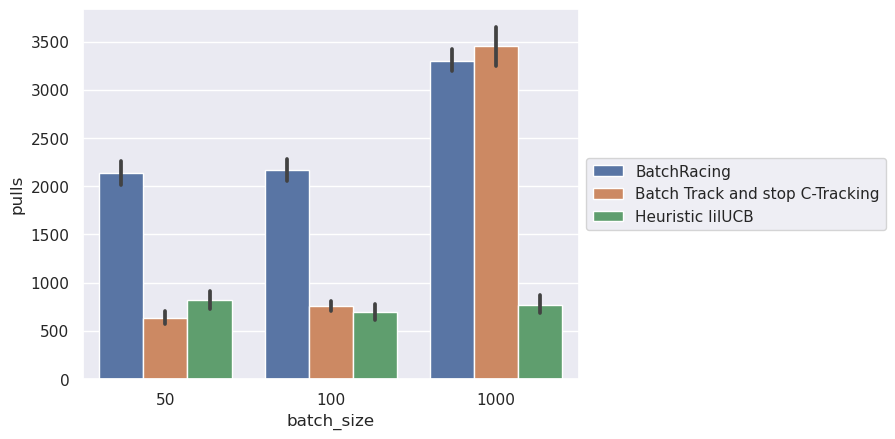

In [17]:
fig = plt.figure()
ax = plt.subplot(111)
sns.barplot(x='batch_size', y='total_actions', hue='learner', data=df)
plt.ylabel('pulls')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

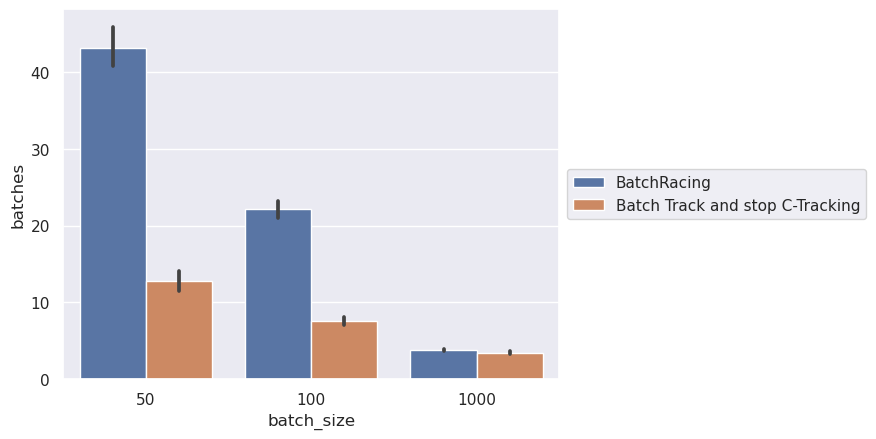

In [19]:
fig = plt.figure()
ax = plt.subplot(111)
df_batches = df[df['learner'] != "Heuristic lilUCB"]
sns.barplot(x='batch_size', y='rounds', hue='learner', data=df_batches)
plt.ylabel('batches')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))